### Team 191 ISYE6644 Project - A Dice and Coin Game

Another game. There are two players, A and B. At the beginning of the game, each starts with 4 coins, and there are 2 coins in the pot. A goes first,
then B, then A. . . . During a particular player’s turn, the player tosses a 6-sided
die. If the player rolls a:


<ul>
  <li>1, then the player does nothing.</li>
  <li>2: then the player takes all coins in the pot.</li>
  <li>3: then the player takes half of the coins in the pot (rounded down).</li>
  <li>4,5,6: then the player puts a coin in the pot.</li>
</ul>


A player loses (and the game is over) if they are unable to perform the task (i.e., if they have 0 coins and need to place one in the pot). We define a cycle as A and then B completing their turns. The exception is if a player goes out; that is the final cycle (but it still counts as the last cycle). We are trying to determine the expected number (and maybe even the distribution) of cycles the game will last for. I’m guessing that you can use “first-step” analysis to get the expected value. Simulation seems the easiest thing to do to get the entire distribution.

In [1]:
# dependencies
import random
import math
import statistics as stats
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
from statsmodels.sandbox.stats.runs import runstest_1samp

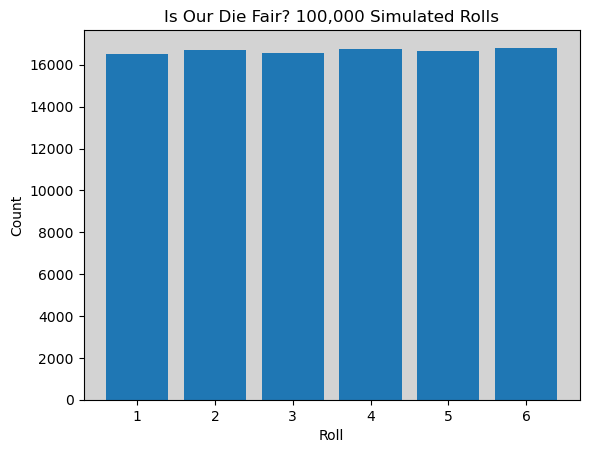

In [2]:
# verifying the random number generator we use works as expected
random.seed(6644)

num_rolls = 100000
simulated_dice_rolls = []

for _ in range(num_rolls):
    simulated_dice_rolls.append(random.randint(1,6))

counts = dict(Counter(simulated_dice_rolls))

plt.rcParams['axes.facecolor'] = 'lightgrey'
plt.bar(counts.keys(),counts.values(), align='center')
plt.title('Is Our Die Fair? 100,000 Simulated Rolls')
plt.xlabel('Roll')
plt.ylabel('Count')
plt.show()

In [3]:
# Goodness of fit test
expected = num_rolls/6
chi2_0 = ( ((counts[1] - expected)**2) + ((counts[2] - expected)**2) + ((counts[3] - expected)**2) + ((counts[4] - expected)**2) + ((counts[5] - expected)**2) + ((counts[6] - expected)**2) )/expected
chi2_crit = scipy.stats.chi2.ppf(1-.05, df=5)

print(f'Chi_Squared Null Value: {chi2_0}')
print(f'Chi_Squared Critical Value: {chi2_crit}')
print(f'Goodness of fit test passes: {chi2_0 < chi2_crit}')

Chi_Squared Null Value: 4.016839999999999
Chi_Squared Critical Value: 11.070497693516351
Goodness of fit test passes: True


In [4]:
# Test of independence
alpha_ = 0.05
test_stat,p_val = runstest_1samp(simulated_dice_rolls, correction=False)

print(f'Runs Test Statistic: {test_stat}')
print(f'Corresponding P-Value: {p_val}')
print(f'Simulated Dice Rolls Passes Runs Test: {p_val > alpha_}')

Runs Test Statistic: 1.1246830261067908
Corresponding P-Value: 0.2607233769535342
Simulated Dice Rolls Passes Runs Test: True


In [6]:
# Game parameters/initial conditions
player_starting_coins = 4
pot_starting_coins = 2
penalty = 1
dice_sides = 6
penalty_rolls = [4,5,6]

In [7]:
# A single simulation with printed output to verify the simulation works
random.seed(6644)
# game variables
turn = 1
player_A_coins = player_starting_coins
player_B_coins = player_starting_coins
pot_coins = pot_starting_coins

print('________________________________________')
while True:

    # print current standings
    print(f'Turn: {turn}')
    print(f'Pot Size: {pot_coins} coins')
    print(f'Player A Coins:{player_A_coins}')
    print(f'Player B Coins:{player_B_coins}')
    print(' ')

    # roll a new value for this turn for each player
    new_roll_player_A = random.randint(1, dice_sides)
    new_roll_player_B = random.randint(1, dice_sides)

    # handle player A's roll first
    print(f'Player A rolled a: {new_roll_player_A}')
    if new_roll_player_A in penalty_rolls:

        # if player A rolls a 4,5,6 and has zero coins, update our turn counter, add B as the winner, end the game
        if player_A_coins == 0:
            print('Player A Loses!')
            break

        else:
            print('Player A loses 1 coin!')
            player_A_coins -= penalty
            pot_coins += penalty

    elif new_roll_player_A == 2:
        # player A gains all the pot coins, pot goes to 0
        print('player A gets the entire pot!')
        player_A_coins += pot_coins
        pot_coins = 0

    elif new_roll_player_A == 3:
        # player A gains half the coins in the pot
        print('Player A gets half the pot rounded down!')
        half_pot = math.floor((pot_coins/2))
        player_A_coins += half_pot
        pot_coins -= half_pot
    else:
        # nothing happens if the roll is a 1
        print('Nothing Happens')
        pass


    print(' ')
    # handle player B's roll second
    print(f'Player B rolled a: {new_roll_player_B}')
    if new_roll_player_B in penalty_rolls:

        # if player B rolls a 4,5,6 and has zero coins, update our turn counter, add B as the winner, end the game
        if player_B_coins == 0:
            print('Player B Loses!')
            break

        else:
            print('Player B loses 1 coin!')
            player_B_coins -= penalty
            pot_coins += penalty

    elif new_roll_player_B == 2:
        # player A gains all the pot coins, pot goes to 0
        print('player B gets the entire pot!')
        player_B_coins += pot_coins
        pot_coins = 0

    elif new_roll_player_B == 3:
        # player B gains half the coins in the pot
        print('Player B gets half the pot rounded down!')
        half_pot = math.floor((pot_coins/2))
        player_B_coins += half_pot
        pot_coins -= half_pot
    else:
        # nothing happens if the roll is a 1
        print('Nothing Happens')
        pass

    # increment turn
    turn += 1

    print(' ')
    print('Turn end results:')
    print(f'Pot Size: {pot_coins} coins')
    print(f'Player A Coins:{player_A_coins}')
    print(f'Player B Coins:{player_B_coins}')

    print('________________________________________')

print('________________________________________')


________________________________________
Turn: 1
Pot Size: 2 coins
Player A Coins:4
Player B Coins:4
 
Player A rolled a: 4
Player A loses 1 coin!
 
Player B rolled a: 5
Player B loses 1 coin!
 
Turn end results:
Pot Size: 4 coins
Player A Coins:3
Player B Coins:3
________________________________________
Turn: 2
Pot Size: 4 coins
Player A Coins:3
Player B Coins:3
 
Player A rolled a: 6
Player A loses 1 coin!
 
Player B rolled a: 4
Player B loses 1 coin!
 
Turn end results:
Pot Size: 6 coins
Player A Coins:2
Player B Coins:2
________________________________________
Turn: 3
Pot Size: 6 coins
Player A Coins:2
Player B Coins:2
 
Player A rolled a: 4
Player A loses 1 coin!
 
Player B rolled a: 2
player B gets the entire pot!
 
Turn end results:
Pot Size: 0 coins
Player A Coins:1
Player B Coins:9
________________________________________
Turn: 4
Pot Size: 0 coins
Player A Coins:1
Player B Coins:9
 
Player A rolled a: 1
Nothing Happens
 
Player B rolled a: 5
Player B loses 1 coin!
 
Turn end r

In [8]:
# running the simulation many times
number_of_sims = 1_000_000

# setting seed for reproducibility
random.seed(6644)

# running results lists
number_of_turns = []
winner = []

for _ in range(number_of_sims):
    # game variables
    turn = 1
    player_A_coins = player_starting_coins
    player_B_coins = player_starting_coins
    pot_coins = pot_starting_coins

    while True:
        # roll a new value for this turn for each player
        new_roll_player_A = random.randint(1, dice_sides)
        new_roll_player_B = random.randint(1, dice_sides)

        # handle player A's roll first
        if new_roll_player_A in penalty_rolls:

            # if player A rolls a 4,5,6 and has zero coins, update our turn counter, add B as the winner, end the game
            if player_A_coins == 0:
                number_of_turns.append(turn)
                winner.append('B')
                break

            else:
                player_A_coins -= penalty
                pot_coins += penalty

        elif new_roll_player_A == 2:
            # player A gains all the pot coins, pot goes to 0
            player_A_coins += pot_coins
            pot_coins = 0

        elif new_roll_player_A == 3:
            # player A gains half the coins in the pot
            half_pot = math.floor((pot_coins/2))
            player_A_coins += half_pot
            pot_coins -= half_pot
        else:
            # nothing happens if the roll is a 1
            pass

        # handle player B's roll second
        if new_roll_player_B in penalty_rolls:

            # if player B rolls a 4,5,6 and has zero coins, update our turn counter, add B as the winner, end the game
            if player_B_coins == 0:
                number_of_turns.append(turn)
                winner.append('A')
                break

            else:
                player_B_coins -= penalty
                pot_coins += penalty

        elif new_roll_player_B == 2:
            # player A gains all the pot coins, pot goes to 0
            player_B_coins += pot_coins
            pot_coins = 0

        elif new_roll_player_B == 3:
            # player B gains half the coins in the pot
            half_pot = math.floor((pot_coins/2))
            player_B_coins += half_pot
            pot_coins -= half_pot
        else:
            # nothing happens if the roll is a 1
            pass

        # increment turn
        turn += 1


Winner Counts:
{'B': 497722, 'A': 502278}

Number of Turns Statistics:
count    1000000.000000
mean          17.514674
std           12.754864
min            5.000000
25%            8.000000
50%           14.000000
75%           22.000000
max          177.000000
dtype: float64



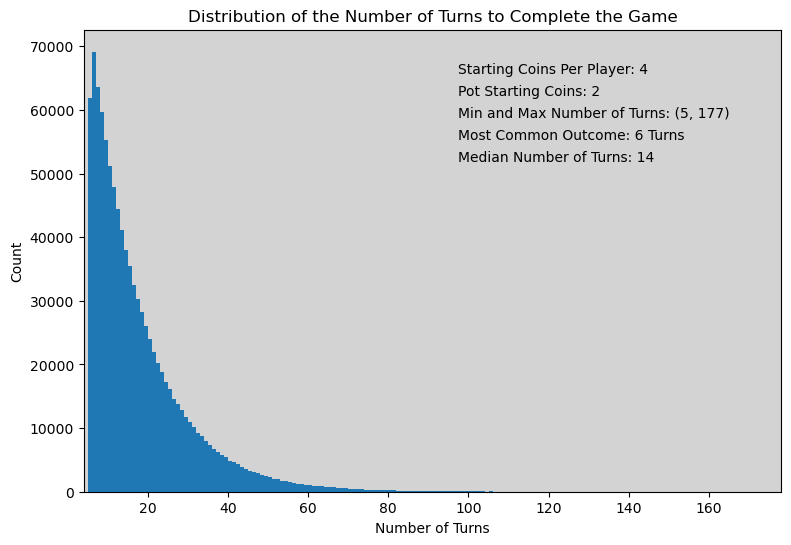

In [9]:
# statistics on the winner
print('Winner Counts:')
print(dict(Counter(winner)))
print()

# statistics on the number of turns
turns_series = pd.Series(number_of_turns)
print('Number of Turns Statistics:')
print(turns_series.describe())
print()

# Visualizing the distribution with matplotlib
plt.figure(figsize=(9,6))
plt.xlim(turns_series.min() - 1, turns_series.max() + 1)
plt.hist(number_of_turns, bins= turns_series.max() - turns_series.min())
plt.title('Distribution of the Number of Turns to Complete the Game')
plt.xlabel('Number of Turns')
plt.ylabel('Count')
plt.text(turns_series.max()*0.55, turns_series.value_counts().values[0] * 0.95, f"Starting Coins Per Player: {player_starting_coins}")
plt.text(turns_series.max()*0.55, turns_series.value_counts().values[0] * 0.90, f"Pot Starting Coins: {pot_starting_coins} ")
plt.text(turns_series.max()*0.55, turns_series.value_counts().values[0] * 0.85, f"Min and Max Number of Turns: {turns_series.min(), turns_series.max()}")
plt.text(turns_series.max()*0.55, turns_series.value_counts().values[0] * 0.80, f"Most Common Outcome: {turns_series.value_counts().index[0]} Turns")
plt.text(turns_series.max()*0.55, turns_series.value_counts().values[0] * 0.75, f"Median Number of Turns: {int(turns_series.median())}")
plt.show()